# Data Analytics

This notebook provides a step-by-step process to generate the following features:<br>
- CQTS database analysis
- LDA model generation
- LDA visualization
- Top Topic representation
- Top Topic timeline
- Semantic search
<br>
<br>
This jupyter notebook and the provided python scripts can be modified to meet specifc requirements or solutions for every Business Unit; the process hereby is intended for generic purposes.

## Libraries

Load the following libraries:

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from data_selection_interface import Data_Selection
from report_statistics import Stats
from top2vec import Top2Vec

## Create Object Instances

In the code zip package, besides this notebook there are three main .py scripts, which are described below:<br>
- data_selection.py
- preprocessing.py
- generic_lda.py
- report_statistics.py
<br>
We create an object instance for each class available:

In [3]:
# Datapath to save the outputs
output_datapath = os.getcwd() + '\\outputs\\'
input_datapath = os.getcwd() + '\\outputs\\'

data_selection = Data_Selection()
stats = Stats()

## Data Selection

Here we load the xlsx files into a pandas dataframe:

In [11]:
data_path = "c:/Users/uidv7259/Documents/Maestria/TOG/data/" #Modify line
data = data_selection.select_files(data_path)

The following lines prints a list of the available products found in the CQTS file:

In [1]:
product_list = data_selection.show_products(data, "C3_SEGMENT_NAME")

Select the segment to analyze. (products_list = None and segment = None, to include all products)

In [5]:
data_selection.data_frame = data_selection.select_product(data = data, category = "C3_SEGMENT_NAME", products_list  = None,segment = None)

Modify variable "dpart" according to the list provided above and "case" according the next list:
1. Solution
2. Problems
3. Cause
4. Problems from C method
5. Analysis from C method

The follwing CQTS columns are currently being considered for the cases stated above:


In [6]:
#Here the DF is converted to a list of concatenated columns with the documents only
c_problems = data_selection.select_case(data_selection.data_frame,dpart = 4)
c_analysis = data_selection.select_case(data_selection.data_frame,dpart = 5)

### Load model

If model was created before, please type the name or complete path in model_name to load it:

In [19]:
# model_name = "_analysis_USE_model" #modify
model_name = "_problems_USE_model"
topic_model = Top2Vec.load(model_name)

# Topic2Vec

Some embedding models can be used to create the top2vec model: <br>
- doc2vec (for large datasets and very unique vocabulary, since it will train doc2vec from scratch)
- universal-sentence-encoder (faster since it is a pretrained model)
- universal-sentence-encoder-multilingual
- distiluse-base-multilingual-cased<br>

Two approaches: since the vocabulary is not too large although specialized instead of using doc2vec we could use universal-sentence-encoder. This can help when adding a new document or many documents so a new training wouldn't be necessary. Investigate if it there's a significant difference between these two, because probably a doc2vec training could suit better.

In [13]:
topic_model = Top2Vec(documents = c_problems, embedding_model = 'universal-sentence-encoder')
# If throws and error install: (pip install) tensorflow and tensorflow_hub  and tensorflow_text

2021-01-23 14:46:31,756 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-01-23 14:46:32,348 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2021-01-23 14:46:44,218 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-01-23 14:46:45,962 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-01-23 14:47:07,932 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-01-23 14:47:08,064 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


## Save model

In [13]:
model_name = "_problems_USE_model"
topic_model.save("c:/Users/uidv7259/Documents/Maestria/TOG/" + model_name)

## Generate WordClouds

In [14]:
topic_words, word_scores, topic_nums = topic_model.get_topics(topic_model.get_num_topics())
# topic_model.get_num_topics()

In [2]:
for topic in topic_nums[:5]:
    topic_model.generate_topic_wordcloud(topic)

In the following line we can print the number of documents each topic represents:

In [17]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()
for i, size in enumerate(topic_sizes):
    print("Topic",i,"has:", size, "documents")

Topic 0 has: 361 documents
Topic 1 has: 254 documents
Topic 2 has: 180 documents
Topic 3 has: 161 documents
Topic 4 has: 156 documents
Topic 5 has: 154 documents
Topic 6 has: 116 documents
Topic 7 has: 114 documents
Topic 8 has: 111 documents
Topic 9 has: 105 documents
Topic 10 has: 103 documents
Topic 11 has: 97 documents
Topic 12 has: 87 documents
Topic 13 has: 84 documents
Topic 14 has: 79 documents
Topic 15 has: 75 documents
Topic 16 has: 75 documents
Topic 17 has: 74 documents
Topic 18 has: 70 documents
Topic 19 has: 69 documents
Topic 20 has: 67 documents
Topic 21 has: 61 documents
Topic 22 has: 60 documents
Topic 23 has: 59 documents
Topic 24 has: 57 documents
Topic 25 has: 57 documents
Topic 26 has: 57 documents
Topic 27 has: 56 documents
Topic 28 has: 55 documents
Topic 29 has: 53 documents
Topic 30 has: 53 documents
Topic 31 has: 47 documents
Topic 32 has: 46 documents
Topic 33 has: 45 documents
Topic 34 has: 45 documents
Topic 35 has: 45 documents
Topic 36 has: 43 documents


We can also show some of the documents that are represented by the topic to have a better understanding. You can modify the variable "topic" depending of the document cluster you want to look at.

In [3]:
topic = 0 #Modify
documents, document_scores, document_ids = topic_model.search_documents_by_topic(topic_num=0,num_docs=topic_sizes[1])
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

## Timeline plots

On this section we'll plot first the number of the issues through time and second their correlation with the topics we got from the model. In two lines you can modify how you want to resample the data: 'D': daily, 'M': monthly, etc.

In [28]:
stats.data_frame =  data_selection.data_frame

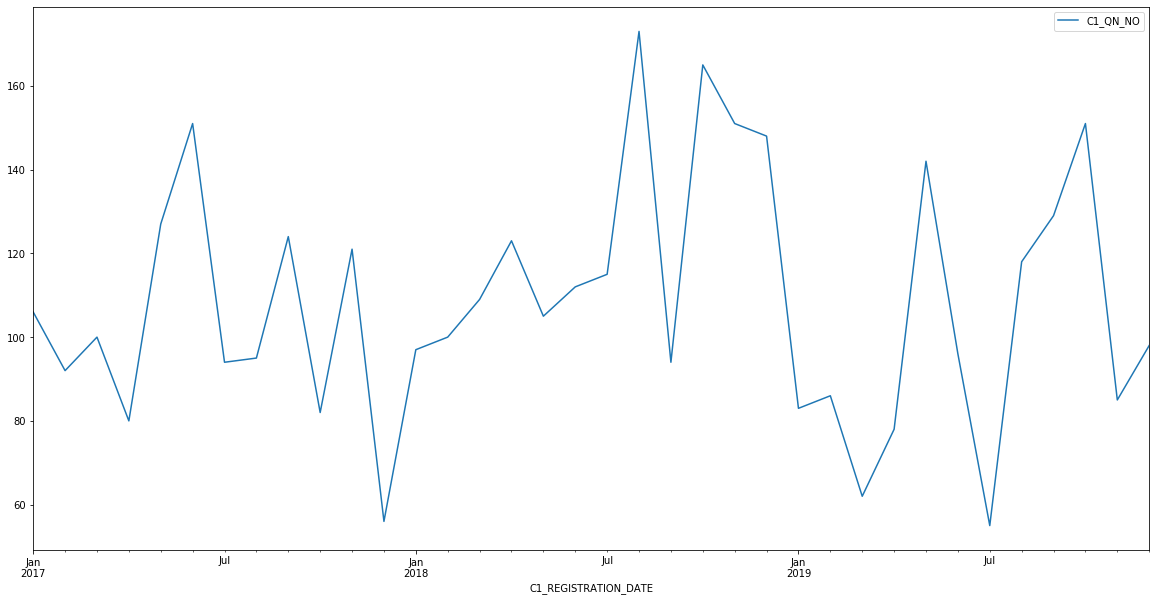

In [29]:
stats.get_statistics('M') #Modify line: 'D':daily, 'M': monthly, etc

In [30]:
topics_list = []
def get_counts(series):
    if series.any():
        series = list(series)
        temp_list = [series.count(i) for i in range(5)]
        topics_list.append(temp_list)

In [31]:
resample = 'M' #Modify line
n_topics = 5 #Modify line

size = len(data)
docs_id_range = list(range(size))
topic_nums, _, _,_ = topic_model.get_documents_topics(doc_ids =docs_id_range)
df = data[['C1_REGISTRATION_DATE']]
df['C1_REGISTRATION_DATE'] = pd.to_datetime(df['C1_REGISTRATION_DATE'])
df['TOPIC'] = pd.Series(topic_nums)
df = df.sort_values(by = ['C1_REGISTRATION_DATE'])
df.head()

C:\Users\uidv7259\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\uidv7259\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,C1_REGISTRATION_DATE,TOPIC
95,2017-01-02,3
93,2017-01-02,0
94,2017-01-02,2
92,2017-01-02,0
202,2017-01-03,5


In [32]:
df.set_index(['C1_REGISTRATION_DATE'], inplace = True)
df_topics = df.resample(resample).apply(get_counts)
topics_only_df = pd.DataFrame(topics_list, columns=['0','1','2','3','4'])
df_topics = df_topics.reset_index()
df_topics = pd.concat([df_topics, topics_only_df], axis = 1)
df_topics = df_topics.drop(['TOPIC'], axis = 1)
df_topics.set_index(['C1_REGISTRATION_DATE'], inplace = True)
df_topics.head()

,0,1,2,3,4
C1_REGISTRATION_DATE,,,,,
2017-01-31,33,11,2,10,0
2017-02-28,16,2,3,2,0
2017-03-31,36,7,8,4,1
2017-04-30,18,5,4,1,0
2017-05-31,48,13,3,12,0


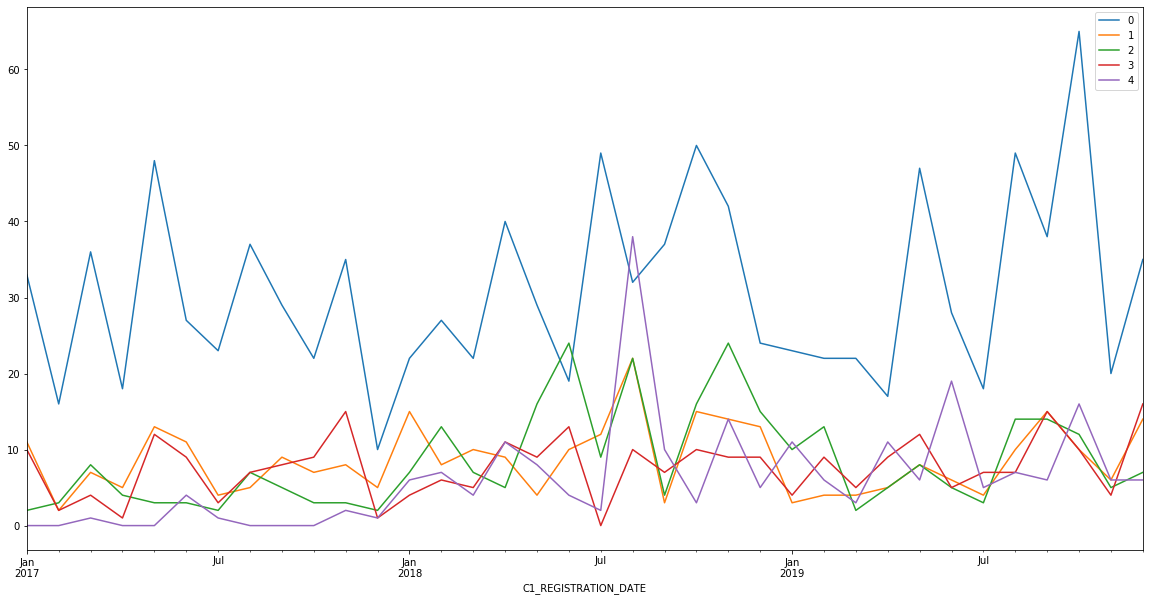

In [33]:
df_topics.plot(figsize=(20,10));

## Document Search

Here we can find a similar problem/solution based on the query data_analysis_predict. As we are working with topic modeling and in order to have better results the queries should be long to get more topics for the search. 



In [4]:
search_query = ['Example---']

topic_model.add_documents(search_query)

In [14]:
# c_problems[3903]

In [5]:
similar_docs, similar_score, docs_ids = topic_model.search_documents_by_documents(doc_ids = [3903], num_docs = 5)
for doc, score, doc_id in zip(similar_docs, similar_score, docs_ids):
    print(f"Issue: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

In [6]:
similar_docs, similar_score, docs_ids = topic_model.search_documents_by_documents(doc_ids = [3903], num_docs = 5)
for doc, score, doc_id in zip(similar_docs, similar_score, docs_ids):
    print(f"Issue: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

In [18]:
# topic_num, topic_score, topic_words , words_score = topic_model.get_documents_topics(doc_ids = [3903])
# print(topic_num, topic_score)

similar_prob_docs = 41 1471 2148 1154  838 <br>
similar_analysis_docs = 2544 3166 3472 1592 2952

In [7]:
docs, doc_scores, doc_ids = topic_model.search_documents_by_keywords(["battery"], 5)
print(docs, doc_scores, doc_ids)

# Merge Topics to Data Frame

On this section, we generate the csv files with the specific information to be imported in Neo4j

## General Info

In [27]:
#Columns to export to Neo4j besides topics
columns_to_export = ['C3_ANALYSIS_PLANT_NAME',
'C1_COMPLAINT_TYP_DESC',
'C1_CUSTOMER_INCIDENT_DATE',
'C1_QN_NO',
'C1_REGISTRATION_DATE',
'C3_CUSTOMER_FAILED_DATE',
'C3_HARDWARE_INDEX',
'C3_SERIAL_NO',
'C3_SOFTWARE_INDEX',
'C3_COMM_DECISION_ACCEPTED_DESC',
'C3_COMM_DECISION_REJECTED_DESC',
'C3_VIN',
'C3_VIN_COUNTER',
'C4_FINAL_ANALYSIS_RESULT',
'C4_DEFECT_CODING_L1_DESC',
'C4_DEFECT_CODING_L2_DESC',
'C4_DEFECT_CODING_L3_DESC',
'C4_DEFECT_CODING_L4_DESC',
'C3_COMPLAINT_DESC',
'C3_PPM_INCIDENT_PLANT_NAME',
'C3_PRODUCTION_PLANT_NAME',
'C1_REGISTRATION_LOCATION_NAME',
'C3_SEGMENT_NAME',
'C4_SOURCE_OF_DEFECT_DESC',
'C1_SUB_CAT_DESC',
'C3_SUB_SEGMENT_NAME',
'C3_MODEL_YEAR',
'C3_VEHICLE_MODEL',
'C3_VEHICLE_PLATFORM']

neo_df = data[columns_to_export]
neo_df = neo_df.reset_index()

In [32]:
neo_df['C4_FINAL_ANALYSIS_RESULT'] = neo_df['C4_FINAL_ANALYSIS_RESULT'].apply(lambda x: str(x).replace('\n', " "))

In [34]:
neo_df.to_csv(output_datapath + "_General_Info.csv",index=False, mode='a')

In [8]:
# neo_df['C4_FINAL_ANALYSIS_RESULT'][0]

In [26]:
only_analysis = neo_df[['index', 'C4_FINAL_ANALYSIS_RESULT']]
only_analysis.to_csv(output_datapath + "_Analyisis.csv",index=False, mode='a')

## Problem Topic

In [21]:
neo_df_problems = neo_df[['index']]
size = len(data)#
docs_id_range = list(range(size))

topic_nums, topic_score, _,_ = topic_model.get_documents_topics(doc_ids =docs_id_range)
neo_df_problems['Problems_Topic'] = topic_nums
neo_df_problems['Problems_Topic_Score'] = topic_score
neo_df_problems['Problems_Topic_Score'] = topic_score

C:\Users\uidv7259\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\uidv7259\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
neo_df_problems.head()

,index,Problems_Topic,Problems_Topic_Score
0,0,2,0.819867
1,1,2,0.703105
2,2,2,0.823502
3,3,34,0.647758
4,4,7,0.833210


In [23]:
neo_df_problems.to_csv(output_datapath + "_Problem_Topics.csv")

## Analysis Topic

In [25]:
neo_df_analysis = neo_df[['index']]
size = len(data)#
docs_id_range = list(range(size))
topic_nums, topic_score, _,_ = topic_model.get_documents_topics(doc_ids =docs_id_range)
neo_df_analysis['Analysis_Topic'] = topic_nums
neo_df_analysis['Analysis_Topic_Score'] = topic_score

C:\Users\uidv7259\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\uidv7259\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
neo_df_analysis.head()

,index,Analysis_Topic,Analysis_Topic_Score
0,0,6,0.844486
1,1,6,0.842876
2,2,0,0.834482
3,3,7,0.812580
4,4,2,0.793213


In [27]:
neo_df_analysis.to_csv(output_datapath + "_Analysis_Topics.csv")

# Exploration

In [74]:
df = data_selection.data_frame[['C4_SOURCE_OF_DEFECT_DESC']]
df['PROBLEMS'] = c_problems
df = df.dropna()
df['C4_SOURCE_OF_DEFECT_DESC'].unique() #C4_DEFECT_CODING_L1_DESC

C:\Users\uidv7259\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['OK Part', 'Customer', 'External Supplier', 'Production', 'NTF',
       'Defect not identified', 'Development',
       'Internal Supplier (IC/IP)', 'SCM / Logistics'], dtype=object)

In [75]:
n = len(df['C4_SOURCE_OF_DEFECT_DESC'].unique())
print(n)

9


In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [76]:
le = preprocessing.LabelEncoder()
le.fit(df['C4_SOURCE_OF_DEFECT_DESC'].tolist())
# df['thal'] = pd.Categorical(df['thal'])
# df['thal'] = df.thal.cat.codes

LabelEncoder()

In [77]:
df['C4_SOURCE_OF_DEFECT_DESC_ENC'] = le.transform(df['C4_SOURCE_OF_DEFECT_DESC'].tolist())

In [78]:
x_train, x_test, y_train, y_test = train_test_split(df['PROBLEMS'], df['C4_SOURCE_OF_DEFECT_DESC_ENC'],test_size=0.2, random_state=42)

In [79]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [80]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [9]:
for example, label in train_dataset.take(1):
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])

In [81]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [10]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

In [82]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
    input_dim = len(encoder.get_vocabulary()),
    output_dim = 64,
    mask_zero = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(n, activation ='softmax')
])

In [83]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [84]:
history = model.fit(train_dataset, epochs = 20 ,validation_data = test_dataset)

Epoch 1/20
49/49 [==============================] - 28s 340ms/step - loss: 2.0371 - accuracy: 0.3084 - val_loss: 1.7270 - val_accuracy: 0.3483
Epoch 2/20
49/49 [==============================] - 13s 273ms/step - loss: 1.6674 - accuracy: 0.3764 - val_loss: 1.6241 - val_accuracy: 0.3700
Epoch 3/20
49/49 [==============================] - 14s 292ms/step - loss: 1.5120 - accuracy: 0.4407 - val_loss: 1.5852 - val_accuracy: 0.3790
Epoch 4/20
49/49 [==============================] - 16s 329ms/step - loss: 1.3972 - accuracy: 0.4785 - val_loss: 1.5944 - val_accuracy: 0.3841
Epoch 5/20
49/49 [==============================] - 16s 318ms/step - loss: 1.3299 - accuracy: 0.5149 - val_loss: 1.5854 - val_accuracy: 0.3739
Epoch 6/20
49/49 [==============================] - 14s 287ms/step - loss: 1.2574 - accuracy: 0.5335 - val_loss: 1.6056 - val_accuracy: 0.4020
Epoch 7/20
49/49 [==============================] - 13s 256ms/step - loss: 1.1281 - accuracy: 0.5906 - val_loss: 1.5965 - val_accuracy: 0.3956